In [1]:
import pandas as pd
import numpy as np 
import dowhy
from dowhy import CausalModel
import dowhy.datasets, dowhy.plotter

In [8]:
df = pd.read_csv(r'C:\Users\diabl\Desktop\MMA Program\Winter 2020 - 1\Entreprise Analytics\Entreprise Final Project\clean_accidents.csv')

In [6]:
df.columns

Index(['Unnamed: 0', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'Side', 'City', 'County', 'State', 'Timezone',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [20]:
df['Temperature(F)'].head()

49    90.0
52    72.0
73    46.0
75    89.0
91    41.0
Name: Temperature(F), dtype: float64

In [9]:
df = df.dropna()

In [10]:
df1 = df.sample(8000)

# Causal Inference

In [19]:
model=CausalModel(
        data = df1,
        treatment=["No_Exit"],
        outcome="Severity",
        common_causes = ['Precipitation(in)','Stop','Temperature(F)'])

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['No_Exit'] on outcome ['Severity']


INFO:dowhy.causal_graph:Using Matplotlib for plotting


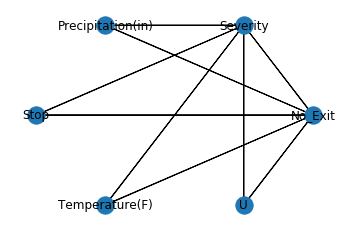

In [20]:
model.view_model()

## Identify the effect

In [21]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['Stop', 'Precipitation(in)', 'Temperature(F)', 'U']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


## Estimate the effect

backdoor.propensity_score_stratification

In [26]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_stratification",target_units="att")#,test_significance=True)
print(estimate)

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: Severity~No_Exit+Stop+Precipitation(in)+Temperature(F)
C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                  
──────────(Expectation(Severity|Stop,Precipitation(in),Temperature(F)))
d[No_Exit]                                                             
Estimand assumption 1, Unconfoundedness: If U→{No_Exit} and U→Severity then P(Severity|No_Exit,Stop,Precipitation(in),Temperature(F),U) = P(Severity|No_Exit,Stop,Precipitation(in),Temperature(F))
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: Severity~No_Exit+Stop+Precipitation(in)+Temperature(F)
## Estimate
Value: nan



C:\Users\diabl\Anaconda3\lib\site-packages\dowhy\causal_estimators\propensity_score_stratification_estimator.py:92: RuntimeWarning: invalid value encountered in double_scalars
  est = (weighted_outcomes['effect'] * weighted_outcomes[treatment_sum_name]).sum() / total_treatment_population


#### Linear Regression

In [27]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression",test_significance=True)
print(estimate)
#print("Causal Estimate is " + str(estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: Severity~No_Exit+Stop+Precipitation(in)+Temperature(F)


*** Causal Estimate ***

## Target estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                                  
──────────(Expectation(Severity|Stop,Precipitation(in),Temperature(F)))
d[No_Exit]                                                             
Estimand assumption 1, Unconfoundedness: If U→{No_Exit} and U→Severity then P(Severity|No_Exit,Stop,Precipitation(in),Temperature(F),U) = P(Severity|No_Exit,Stop,Precipitation(in),Temperature(F))
### Estimand : 2
Estimand name: iv
No such variable found!

## Realized estimand
b: Severity~No_Exit+Stop+Precipitation(in)+Temperature(F)
## Estimate
Value: -0.10140682111999011

## Statistical Significance
p-value: 0.334



#### backdoor.propensity_score_matching

In [ ]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching",test_significance=True)
print(estimate)
#print("Causal Estimate is " + str(estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Matching Estimator
INFO:dowhy.causal_estimator:b: Severity~No_Exit+Stop+Precipitation(in)+Temperature(F)
C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diabl\Anaconda3\lib\site-packages\

C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\diabl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

#### regression_discontinuity

In [ ]:
causal_estimate_regdist = model.estimate_effect(identified_estimand,
        method_name="iv.regression_discontinuity",
        method_params={'rd_variable_name':'Z1',
                       'rd_threshold_value':0.5,
                       'rd_bandwidth': 0.1})
print(causal_estimate_regdist)
print("Causal Estimate is " + str(causal_estimate_regdist.value))

## Refute